In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [10]:
df=pd.read_csv(r"./cardio_train.csv",  delimiter=';')
df.drop(['id'], axis = 1, inplace=True)

In [19]:
df.describe()
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = df[features]
y = df['cardio']

In [13]:
x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)

In [15]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17645335, 0.14341115, 0.10308888, 0.09237881, 0.08992198,
       0.08934537, 0.08496648, 0.07357909, 0.0569561 , 0.04901013,
       0.04088864])

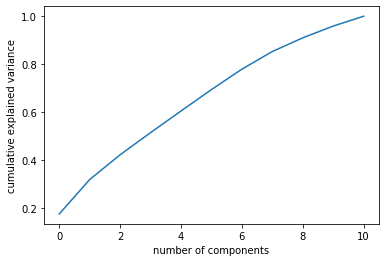

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.521293,-1.089381,0.184751,-0.089522,-0.565476,0.288893,0.002810,-1.132016,-0.535095,-0.164727,0.579127
1,0.912458,1.726798,-0.253653,0.190462,-0.405668,0.246011,-0.005842,0.818800,0.638495,-1.814626,0.210930
2,0.803694,1.114356,0.195120,-0.832354,1.577707,-0.680217,0.758509,-0.412813,-0.019412,-2.096095,-0.765721
3,-1.044805,-0.805892,0.838345,0.125422,-0.648306,0.410102,0.352831,-0.150953,-0.187384,-0.061978,0.814289
4,1.547280,-1.080408,-0.199603,-0.764887,1.710823,-0.873526,0.769984,-0.340312,0.027443,-0.049788,0.088357


In [12]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, df[['cardio']]], axis = 1)

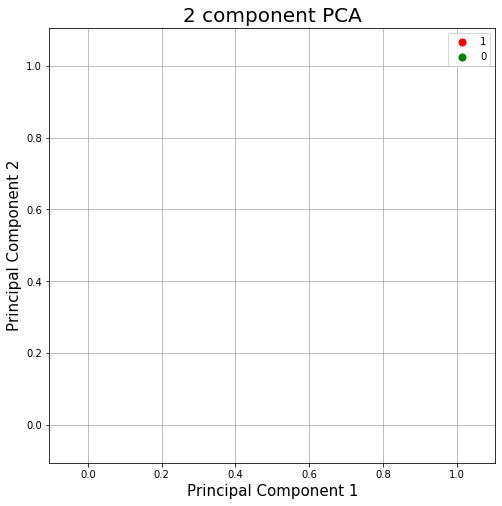

In [22]:
import matplotlib. pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '0']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cardio'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [27]:
finalDf.columns

Index(['principal component 1', 'principal component 2', 'cardio'], dtype='object')

KeyError: 'principal component 1'

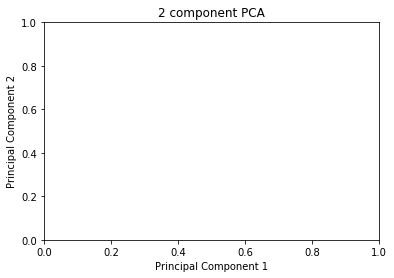

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cardio'] == target
    ax.scatter(x_pca.loc[indicesToKeep, 'principal component 1'], x_pca.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [31]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [66]:
pca = PCA(n_components=8)
principalComponents = pca.fit(x_train)

In [67]:
principalComponents

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [69]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred=clf.predict(x_test)
#y_pred=clf.predict_proba(x_test)
print (accuracy_score(y_pred,y_test))

/home/farid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7192857142857143


In [59]:
y_pred = LogisticRegression().predict(x_test.reshape(1,-1))

NotFittedError: This LogisticRegression instance is not fitted yet